In [1]:
import nltk

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        C:\Users\Hariharan\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [3]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
#Collection of text is called a corpus.
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')
#Clearly we can see that the values are separated by a tab(tab separated values file (TSV))

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [7]:
#We should detect which ones are spam and which ones are ham
import pandas as pd

In [14]:
messages = pd.read_csv('SMSSpamCollection',sep = '\t',names = ['label','message'])

In [15]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [17]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [18]:
messages['length'] = messages['message'].apply(len)

In [19]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

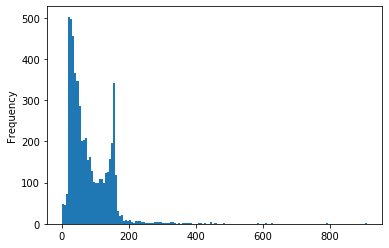

In [24]:
messages['length'].plot.hist(bins = 150)

In [23]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [27]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B9F2D4188>,
      dtype=object)

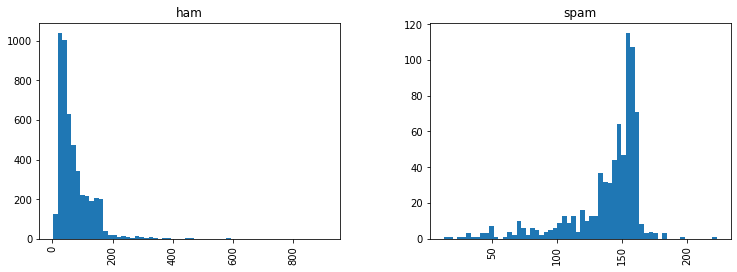

In [28]:
messages.hist(column='length',by = 'label',bins = 60, figsize=(12,4))
#x axis is the length of message and as per trend,spam msg re longer than ham ones

In [29]:
import string

In [55]:
#Remove punctuation
mess = 'Sample message! Note: It has punctuation.'

In [56]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [57]:
nopunc = [c for c in mess if c not in string.punctuation]

In [58]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'e',
 ' ',
 'I',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [37]:
#To remove stop words:(commonly used words without any distinguishing features)
from nltk.corpus import stopwords

In [65]:
#List of stopwords
stoplist = stopwords.words('english')

In [66]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [59]:
nopunc = ''.join(nopunc) #join fn joins the elements and puts whatever is '' between each element

In [60]:
nopunc

'Sample message Note It has punctuation'

In [61]:
nopunc.split()

['Sample', 'message', 'Note', 'It', 'has', 'punctuation']

In [63]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stoplist]

In [64]:
clean_mess #Data Cleaning

['Sample', 'message', 'Note', 'punctuation']

In [68]:
#Create the function to do all of this
def text_process(mess):
    """
    1.Remove Punctuation
    2.Remove stop words
    3.Return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word not in stoplist]

In [69]:
#This process is called tokenization:Taking the words and creating a token(a clean version of what we want)

In [70]:
messages['message'].head(5)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [71]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: message, dtype: object

In [72]:
#Now we convert this list of tokens into a vector model that the ML algo can understand

In [73]:
#3 steps to follow:
"""
    1. Count no.of time a word occurs(Term frequency)
    2. Weigh the counts, so that frequent tokens get lower weights(IDF - Inverse document frequency)
    3. Normalise vectors into unit length to abstract from original text length(L2 norm)
"""

'\n    1. Count no.of time a word occurs(Term frequency)\n    2. Weigh the counts, so that frequent tokens get lower weights(IDF - Inverse document frequency)\n    3. Normalise vectors into unit length to abstract from original text length(L2 norm)\n'

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
#Bag of words is a huuge N x N 2D matrix with each word as a label on rows and all the file names as columns.Elements
#are the no. of times that word is in that file

In [77]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [78]:
print(len(bow_transformer.vocabulary_))

11617


In [79]:
mess25 = messages['message'][24]

In [80]:
print(mess25)

Ffffffffff. Alright no way I can meet up with you sooner?


In [82]:
bow25 = bow_transformer.transform([mess25])

In [86]:
print(bow25)

  (0, 1069)	1
  (0, 1956)	1
  (0, 2362)	1
  (0, 8284)	1
  (0, 10124)	1
  (0, 11171)	1


In [87]:
print(bow25.shape)

(1, 11617)


In [88]:
bow_transformer.get_feature_names()[1069]

'Alright'

In [89]:
message_bow = bow_transformer.transform(messages['message'])

In [90]:
print('Shape of sparse matrix: ', message_bow.shape)

Shape of sparse matrix:  (5572, 11617)


In [91]:
message_bow.nnz #No. of non 0 occurences

56024

In [92]:
from sklearn.feature_extraction.text import TfidfTransformer

In [93]:
tfidf_transformer = TfidfTransformer().fit(message_bow)

In [94]:
tfidf25 = tfidf_transformer.transform(bow25)

In [96]:
print(tfidf25)

  (0, 11171)	0.31627829777945515
  (0, 10124)	0.5009277943700667
  (0, 8284)	0.3351292601221799
  (0, 2362)	0.16137974118934115
  (0, 1956)	0.5581859194548433
  (0, 1069)	0.4462205963951497


In [100]:
#Find tfidf for any word
tfidf_transformer.idf_[bow_transformer.vocabulary_['please']]

5.514814923396225

In [101]:
messages_tfidf = tfidf_transformer.transform(message_bow)

In [102]:
#For spam ham classification we can first try Naive-Bayes classifier
from sklearn.naive_bayes import MultinomialNB

In [103]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [104]:
spam_detect_model.predict(tfidf25)

array(['ham'], dtype='<U4')

In [105]:
spam_detect_model.predict(tfidf25)[0] #Model predicts that its a ham

'ham'

In [106]:
#Lets check label for 25th message
messages['label'][24]

'ham'

In [107]:
#It is predicting CORRECTLY!

In [108]:
#For all messages:
all_pred = spam_detect_model.predict(messages_tfidf)

In [109]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [110]:
#But we did all this on 1 dataset(both train and test). So now we split it to training and testing DS and try again

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size = 0.3)

In [113]:
msg_train

3894                       Have you heard from this week?
2111                  Do we have any spare power supplies
1908                                      ELLO BABE U OK?
265                            Why you Dint come with us.
498     Some of them told accenture is not confirm. Is...
                              ...                        
4902         Taka lor. Wat time u wan 2 come n look 4 us?
4270                Beauty sleep can help ur pimples too.
1275    Let me know how to contact you. I've you settl...
3928    Lol ... I really need to remember to eat when ...
3207                                        At home also.
Name: message, Length: 3900, dtype: object

In [114]:
#In real world scenario we won't do all the complex steps from above, but use SciKit's data pipelining capability
from sklearn.pipeline import Pipeline

In [115]:
#IN pipeline we pass a list with the label for the process, and the process main line
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer = text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])
#All steps will be done automatically insted of us doing them as in prev.steps above
#For classifier you can also try RandomForestClassifier() [from sklearn.ensembe import RandomForestClassifier]

In [116]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000023BA5006678>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [117]:
predictions = pipeline.predict(msg_test)

In [118]:
from sklearn.metrics import classification_report

In [119]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1447
        spam       1.00      0.70      0.83       225

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



In [120]:
#So now python can work on text data using SciKit Learn